In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load Data
hpd = pd.read_csv('ZHVI.csv')
eid = pd.read_csv('FEDFUNDS.csv')
chd = pd.read_csv('CPIHOSSL.csv')
ced = pd.read_csv('CPIEHOUSE.csv')
mud = pd.read_csv('MORTGAGE30US.csv')
surpd = pd.read_csv('State_Urban_Rural_Pop_2020_2010.csv')

In [2]:
# Step 2: Data Cleaning

# Handle missing values
hpd.dropna(inplace=True)
eid.dropna(inplace=True)
chd.dropna(inplace=True)
ced.dropna(inplace=True)
mud.dropna(inplace=True)
surpd.dropna(inplace=True)

# Handle duplicates
hpd.drop_duplicates(inplace=True)
eid.drop_duplicates(inplace=True)
chd.drop_duplicates(inplace=True)
ced.drop_duplicates(inplace=True)
mud.drop_duplicates(inplace=True)
surpd.drop_duplicates(inplace=True)

# Convert 'DATE' column to datetime format if available
if 'DATE' in hpd.columns:
    hpd['DATE'] = pd.to_datetime(hpd['DATE'])

# Convert 'Home_Price' column to float, remove thousands separator if available
if 'Home_Price' in hpd.columns:
    hpd['Home_Price'] = hpd['Home_Price'].str.replace(',', '').astype(float)

    # Convert prices from euros to dollars if applicable
    # Assuming 'Home_Price' is in euros and the exchange rate is 1.1
    hpd['Home_Price'] = hpd['Home_Price'] * 1.1

    # Check for outliers using box plot
    sns.boxplot(x=hpd['Home_Price'])
    plt.show()

    # Calculate z-scores for 'Home_Price'
    z_scores = (hpd['Home_Price'] - hpd['Home_Price'].mean()) / hpd['Home_Price'].std()

    # Filter out outliers
    hpd_clean = hpd[abs(z_scores) <= 3]
    
    # Display the first few rows of DataFrame hpd
display(hpd.head())

# Display the first few rows of DataFrame eid
display(eid.head())

# Display the first few rows of DataFrame chd
display(chd.head())

# Display the first few rows of DataFrame ced
display(ced.head())

display(mud.head())

display(surpd.head())



,Unnamed: 0,Virginia,California,Florida,New Jersey,Michigan,Washington,Colorado,Arizona,New York,...,Oklahoma,Rhode Island,Oregon,Iowa,Ohio,North Dakota,Missouri,Wisconsin,South Carolina,Louisiana
108,2009-01-01,227270.417191,321158.028567,174271.664510,318458.076407,113692.213822,282196.660997,219731.755349,186215.254944,270239.245821,...,107083.743559,240901.579260,244169.457505,117427.706473,119382.305986,155672.510433,131695.095090,161201.834162,151744.242617,150435.684186
109,2009-02-01,225700.127602,316272.215406,170954.430943,316689.779431,111682.313286,279561.847882,219278.105386,182782.653203,268922.200732,...,106845.933275,237787.119057,241932.873224,117225.134898,118582.990381,155682.017260,131275.727920,160196.314276,150852.368207,150344.918229
110,2009-03-01,224161.603856,312225.564557,167835.894404,314983.156461,109734.036973,276802.133064,218970.612320,179705.002760,267754.726260,...,106671.749817,234751.834907,239694.691465,117047.608942,117860.088001,155640.709645,130957.709828,159352.364033,150117.000384,150318.465391
111,2009-04-01,222788.155874,308423.084781,164730.765637,312796.246162,108060.027838,273219.907147,218736.277693,176592.544000,266760.497082,...,106540.826853,232410.862447,237149.219183,116943.654147,117350.832827,155435.549788,130644.547320,159136.343146,149425.590207,150475.434319
112,2009-05-01,221619.874882,304738.355951,161726.798460,310463.769783,106590.788356,269844.054785,218444.216512,173095.041929,265846.671650,...,106585.770027,230362.858081,234742.409363,116882.306901,116991.475828,155098.324300,130246.896941,158748.377180,148634.277388,150545.040776


,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


,DATE,CPIHOSSL_PCA
0,1968-01-01,4.00541
1,1969-01-01,6.19308
2,1970-01-01,6.93457
3,1971-01-01,4.44546
4,1972-01-01,3.88328


,DATE,CPIEHOUSE_PCA
0,1984-01-01,4.16531
1,1985-01-01,3.98306
2,1986-01-01,2.75976
3,1987-01-01,3.19196
4,1988-01-01,4.04608


,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


,STATEFP,STATE ABBREV,STATE NAME,2020 TOTAL POP,2020 \nURBAN POP,2020 PCT URBAN POP,2020 \nRURAL POP,2020 PCT RURAL POP,2010 \nTOTAL POP,2010 \nURBAN POP,2010 PCT URBAN POP,2010\n RURAL POP,2010 PCT RURAL POP,Unnamed: 13


In [3]:
# Step 3: Feature Engineering

# Extract relevant features from hpd
hpd_features = hpd.copy()  # Create a copy of the hpd DataFrame
surpd_features = hpd.copy()
eid_features = eid[['DATE', 'FEDFUNDS']]
chd_features = chd[['DATE', 'CPIHOSSL_PCA']]
ced_features = ced[['DATE', 'CPIEHOUSE_PCA']]
mud_features = mud[['DATE', 'MORTGAGE30US']]

display(hpd_features.head())
display(eid_features.head())
display(chd_features.head())
display(ced_features.head())
display(mud_features.head())
display(surpd_features.head())

,Unnamed: 0,Virginia,California,Florida,New Jersey,Michigan,Washington,Colorado,Arizona,New York,...,Oklahoma,Rhode Island,Oregon,Iowa,Ohio,North Dakota,Missouri,Wisconsin,South Carolina,Louisiana
108,2009-01-01,227270.417191,321158.028567,174271.664510,318458.076407,113692.213822,282196.660997,219731.755349,186215.254944,270239.245821,...,107083.743559,240901.579260,244169.457505,117427.706473,119382.305986,155672.510433,131695.095090,161201.834162,151744.242617,150435.684186
109,2009-02-01,225700.127602,316272.215406,170954.430943,316689.779431,111682.313286,279561.847882,219278.105386,182782.653203,268922.200732,...,106845.933275,237787.119057,241932.873224,117225.134898,118582.990381,155682.017260,131275.727920,160196.314276,150852.368207,150344.918229
110,2009-03-01,224161.603856,312225.564557,167835.894404,314983.156461,109734.036973,276802.133064,218970.612320,179705.002760,267754.726260,...,106671.749817,234751.834907,239694.691465,117047.608942,117860.088001,155640.709645,130957.709828,159352.364033,150117.000384,150318.465391
111,2009-04-01,222788.155874,308423.084781,164730.765637,312796.246162,108060.027838,273219.907147,218736.277693,176592.544000,266760.497082,...,106540.826853,232410.862447,237149.219183,116943.654147,117350.832827,155435.549788,130644.547320,159136.343146,149425.590207,150475.434319
112,2009-05-01,221619.874882,304738.355951,161726.798460,310463.769783,106590.788356,269844.054785,218444.216512,173095.041929,265846.671650,...,106585.770027,230362.858081,234742.409363,116882.306901,116991.475828,155098.324300,130246.896941,158748.377180,148634.277388,150545.040776


,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


,DATE,CPIHOSSL_PCA
0,1968-01-01,4.00541
1,1969-01-01,6.19308
2,1970-01-01,6.93457
3,1971-01-01,4.44546
4,1972-01-01,3.88328


,DATE,CPIEHOUSE_PCA
0,1984-01-01,4.16531
1,1985-01-01,3.98306
2,1986-01-01,2.75976
3,1987-01-01,3.19196
4,1988-01-01,4.04608


,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


,Unnamed: 0,Virginia,California,Florida,New Jersey,Michigan,Washington,Colorado,Arizona,New York,...,Oklahoma,Rhode Island,Oregon,Iowa,Ohio,North Dakota,Missouri,Wisconsin,South Carolina,Louisiana
108,2009-01-01,227270.417191,321158.028567,174271.664510,318458.076407,113692.213822,282196.660997,219731.755349,186215.254944,270239.245821,...,107083.743559,240901.579260,244169.457505,117427.706473,119382.305986,155672.510433,131695.095090,161201.834162,151744.242617,150435.684186
109,2009-02-01,225700.127602,316272.215406,170954.430943,316689.779431,111682.313286,279561.847882,219278.105386,182782.653203,268922.200732,...,106845.933275,237787.119057,241932.873224,117225.134898,118582.990381,155682.017260,131275.727920,160196.314276,150852.368207,150344.918229
110,2009-03-01,224161.603856,312225.564557,167835.894404,314983.156461,109734.036973,276802.133064,218970.612320,179705.002760,267754.726260,...,106671.749817,234751.834907,239694.691465,117047.608942,117860.088001,155640.709645,130957.709828,159352.364033,150117.000384,150318.465391
111,2009-04-01,222788.155874,308423.084781,164730.765637,312796.246162,108060.027838,273219.907147,218736.277693,176592.544000,266760.497082,...,106540.826853,232410.862447,237149.219183,116943.654147,117350.832827,155435.549788,130644.547320,159136.343146,149425.590207,150475.434319
112,2009-05-01,221619.874882,304738.355951,161726.798460,310463.769783,106590.788356,269844.054785,218444.216512,173095.041929,265846.671650,...,106585.770027,230362.858081,234742.409363,116882.306901,116991.475828,155098.324300,130246.896941,158748.377180,148634.277388,150545.040776


In [4]:
# Merge datasets using outer join and specifying suffixes
mdf = pd.merge(eid, chd, on='DATE', how='outer', suffixes=('_eid', '_chd'))
mdf = pd.merge(mdf, ced, on='DATE', how='outer', suffixes=('_chd', '_ced'))
mdf = pd.merge(mdf, mud, on='DATE', how='outer', suffixes=('_ced', '_mud'))

# Assuming eid_features, chd_features, and ced_features have already been defined
if 'DATE' in eid_features.columns:
    mdf = pd.merge(mdf, eid_features, on='DATE', how='outer', suffixes=('_mud', '_eid'))
if 'DATE' in chd_features.columns:
    mdf = pd.merge(mdf, chd_features, on='DATE', how='outer', suffixes=('_eid', '_chd'))
if 'DATE' in ced_features.columns:
    mdf = pd.merge(mdf, ced_features, on='DATE', how='outer', suffixes=('_chd', '_ced'))
if 'DATE' in mud_features.columns:
    mdf = pd.merge(mdf, mud_features, on='DATE', how='outer', suffixes=('_ced', '_mud'))

# Display the first few rows of the merged DataFrame
display(mdf.head())


,DATE,FEDFUNDS_mud,CPIHOSSL_PCA_eid,CPIEHOUSE_PCA_chd,MORTGAGE30US_ced,FEDFUNDS_eid,CPIHOSSL_PCA_chd,CPIEHOUSE_PCA_ced,MORTGAGE30US_mud
0,1954-07-01,0.80,NaN,NaN,NaN,0.80,NaN,NaN,NaN
1,1954-08-01,1.22,NaN,NaN,NaN,1.22,NaN,NaN,NaN
2,1954-09-01,1.07,NaN,NaN,NaN,1.07,NaN,NaN,NaN
3,1954-10-01,0.85,NaN,NaN,NaN,0.85,NaN,NaN,NaN
4,1954-11-01,0.83,NaN,NaN,NaN,0.83,NaN,NaN,NaN


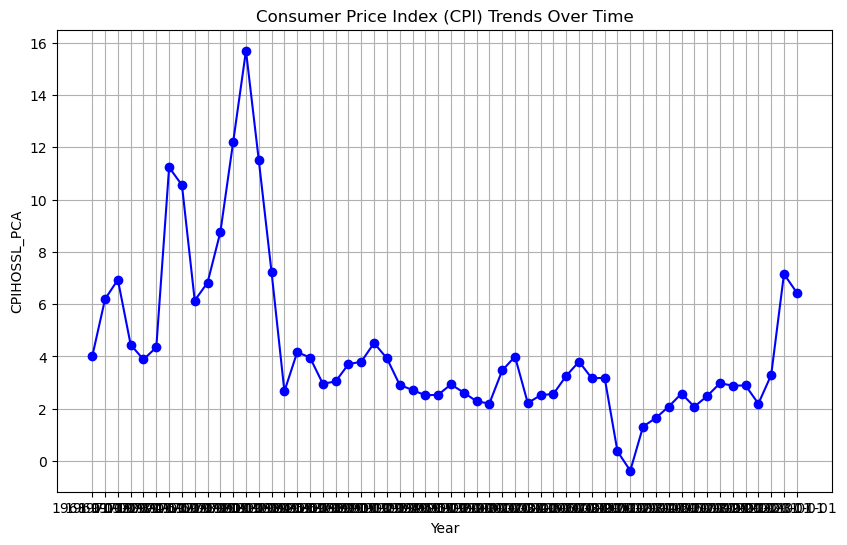

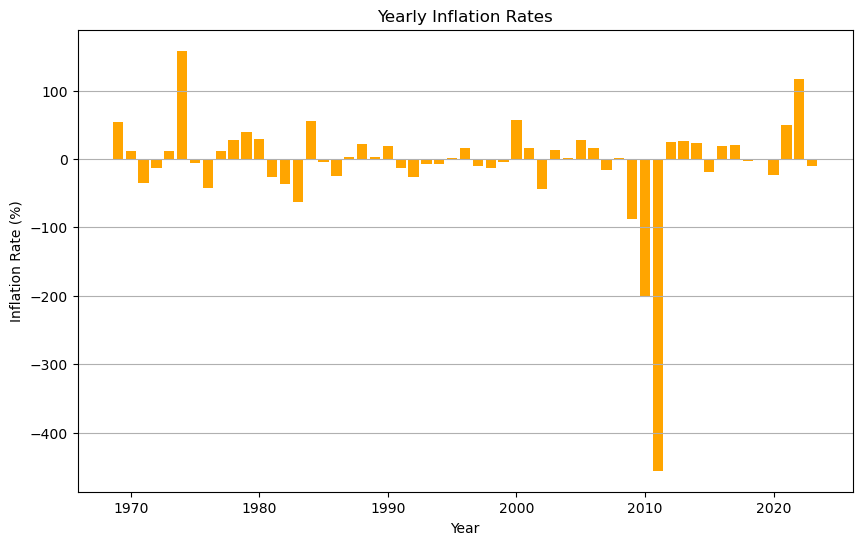

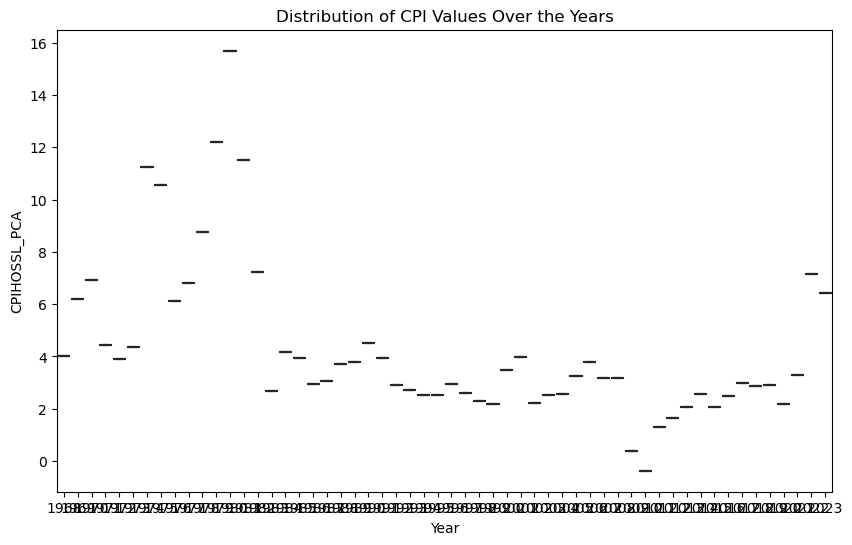

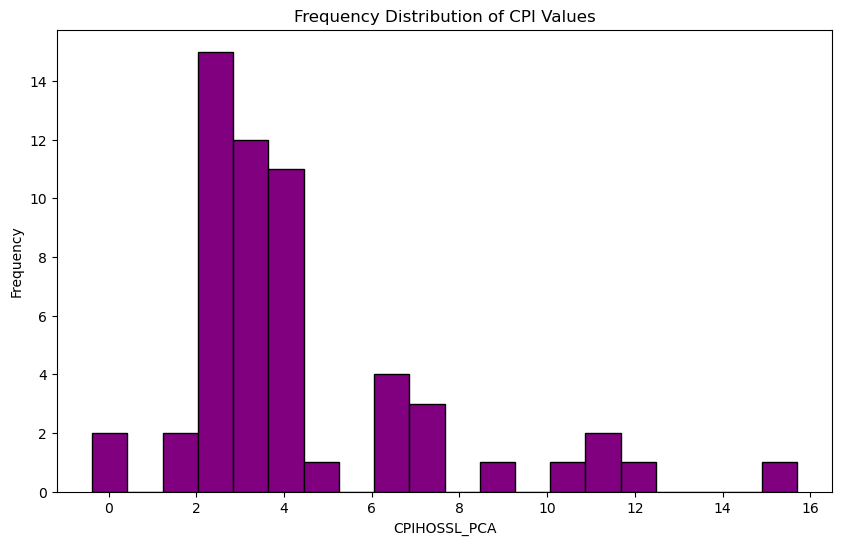

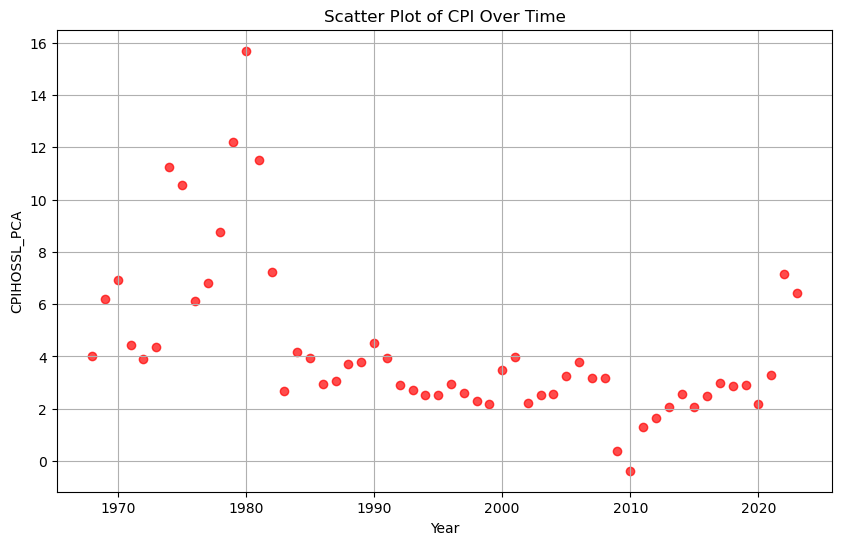

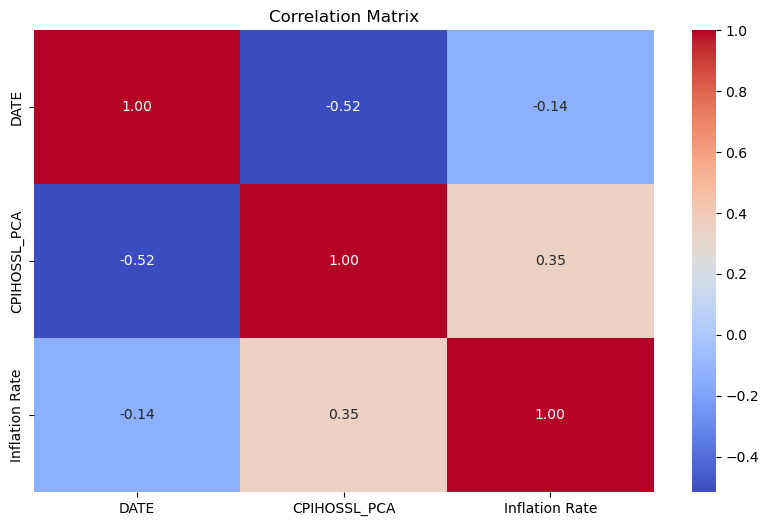

In [5]:
# Step 4: Exploratory Data Analysis (EDA)
# Credit to DK

# Visualization 1: Line Chart - CPI Trends Over Time
plt.figure(figsize=(10, 6))
plt.plot(chd['DATE'], chd['CPIHOSSL_PCA'], marker='o', linestyle='-', color='b')
plt.title('Consumer Price Index (CPI) Trends Over Time')
plt.xlabel('Year')
plt.ylabel('CPIHOSSL_PCA')
plt.grid(True)
plt.show()

# Convert 'DATE' column to datetime format
chd['DATE'] = pd.to_datetime(chd['DATE'])

# Calculate inflation rate
chd['Inflation Rate'] = chd['CPIHOSSL_PCA'].pct_change() * 100

# Plot yearly inflation rates
plt.figure(figsize=(10, 6))
plt.bar(chd['DATE'].dt.year, chd['Inflation Rate'], color='orange')
plt.title('Yearly Inflation Rates')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=chd['DATE'].dt.year, y=chd['CPIHOSSL_PCA'], color='green')
plt.title('Distribution of CPI Values Over the Years')
plt.xlabel('Year')
plt.ylabel('CPIHOSSL_PCA')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(chd['CPIHOSSL_PCA'], bins=20, color='purple', edgecolor='black')
plt.title('Frequency Distribution of CPI Values')
plt.xlabel('CPIHOSSL_PCA')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(chd['DATE'], chd['CPIHOSSL_PCA'], color='red', alpha=0.7)
plt.title('Scatter Plot of CPI Over Time')
plt.xlabel('Year')
plt.ylabel('CPIHOSSL_PCA')
plt.grid(True)
plt.show()

correlation_matrix = chd.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Step 5: Regression Analysis
# Prepare data for regression analysis
# Split data into training and testing sets
# Train regression model
# Evaluate model performance
# Visualize actual vs predicted home prices

In [7]:
# Step 6: Identify State with Greatest Price Increase
# Calculate percentage change in home prices for each state over 5 and 10 years
# Determine state with greatest increase in home prices for each time period

In [8]:
# Step 7: Correlation Analysis
# Calculate correlation coefficients between home price index and economic indicators
# Visualize correlations
# Calculate correlation between urbanization rates and house pricing for 2010 vs 2020

In [9]:
# Step 8: Average Change in Home Prices in the US
# Calculate percentage change in home prices for the US over 5 and 10 years
# Compute average change in home prices